In [1]:
using Revise

In [2]:
using Plots

In [19]:
using Roots

In [21]:
include("exact.jl")

In [102]:
freq = zeros(Float, rank)
freq[1] = 1.0
Q = [zeros(Float, rank), ]
Q[1][1] = 1.0 / Norm(freq[1])

1.414213562373095

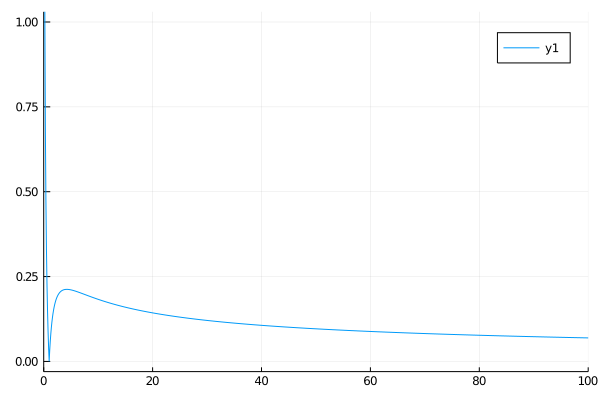

In [103]:
ω = LinRange(0.0, 100.0, 1000)
y = [Norm(freq, Q, w) for w in ω]
plot(ω, y, xlims=(0.0, 100.0), ylims=[0.0, 1.0])

In [97]:
DNorm2(freq, Q, 1e-3)

-5.0e-5

In [104]:
q2=find_zero(x->DNorm2(freq, Q, x), (1.0+1e-10, 100.0), Bisection())

4.236067977499788

In [105]:
freq[2] = q2
push!(Q, orthognalize(freq, Q, freq[2]))
testOrthgonal(freq, Q)

Max Err: 2.220446049250313e-16


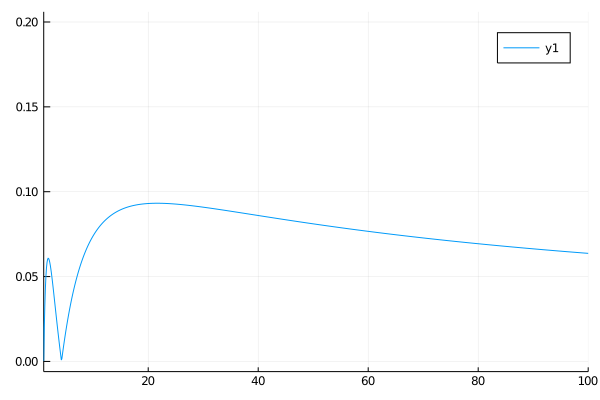

In [106]:
ω = LinRange(0.0, 100.0, 1000)
y = [Norm(freq, Q, w) for w in ω]
plot(ω, y, xlims=(1.0, 100.0), ylims=[0.0, 0.2])

In [107]:
q3=find_zero(x->DNorm2(freq, Q, x), (freq[2]+1e-10, 100.0), Bisection())

21.628727274010252

In [108]:
freq[3] = q3
push!(Q, orthognalize(freq, Q, freq[3]))
testOrthgonal(freq, Q)

Max Err: 2.220446049250313e-16


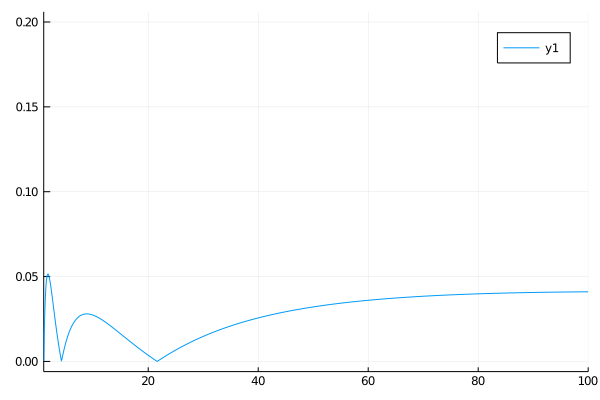

In [109]:
ω = LinRange(0.0, 100.0, 1000)
y = [Norm(freq, Q, w) for w in ω]
plot(ω, y, xlims=(1.0, 100.0), ylims=[0.0, 0.2])

In [110]:
q4=find_zero(x->DNorm2(freq, Q, x), (freq[1]+1e-10, freq[2]-1e-10), Bisection())

1.7636062228413898

Max Err: 2.653433028854124e-14


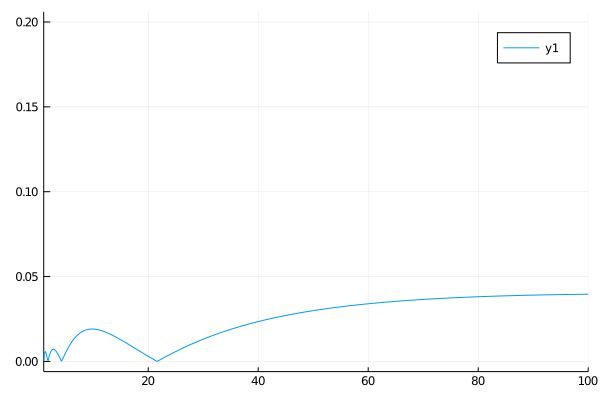

In [111]:
freq[4] = q4
push!(Q, orthognalize(freq, Q, freq[4]))
testOrthgonal(freq, Q)
ω = LinRange(0.0, 100.0, 1000)
y = [Norm(freq, Q, w) for w in ω]
plot(ω, y, xlims=(1.0, 100.0), ylims=[0.0, 0.2])

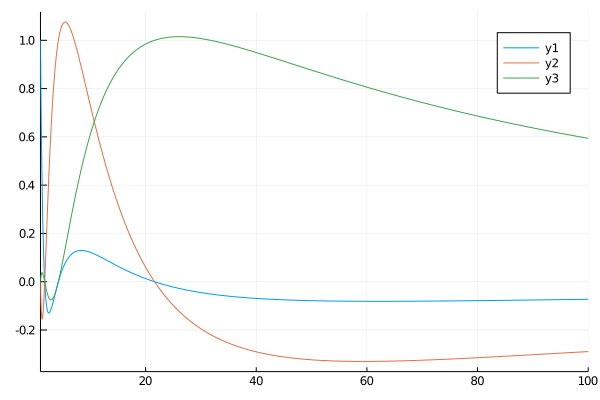

In [112]:
ω=LinRange(1.0, 100.0, 1000)

p1=[projectedKernel(freq, Q, w)[1] for w in ω]
p2=[projectedKernel(freq, Q, w)[2] for w in ω]
p3=[projectedKernel(freq, Q, w)[3] for w in ω]
#println(length(p), length(ω))
plot(ω, p1, xlims=(1.0, 100.0))
plot!(ω, p2, xlims=(1.0, 100.0))
plot!(ω, p3, xlims=(1.0, 100.0))